# 3. 비지도 학습과 데이터 전처리

### 3.3.3 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

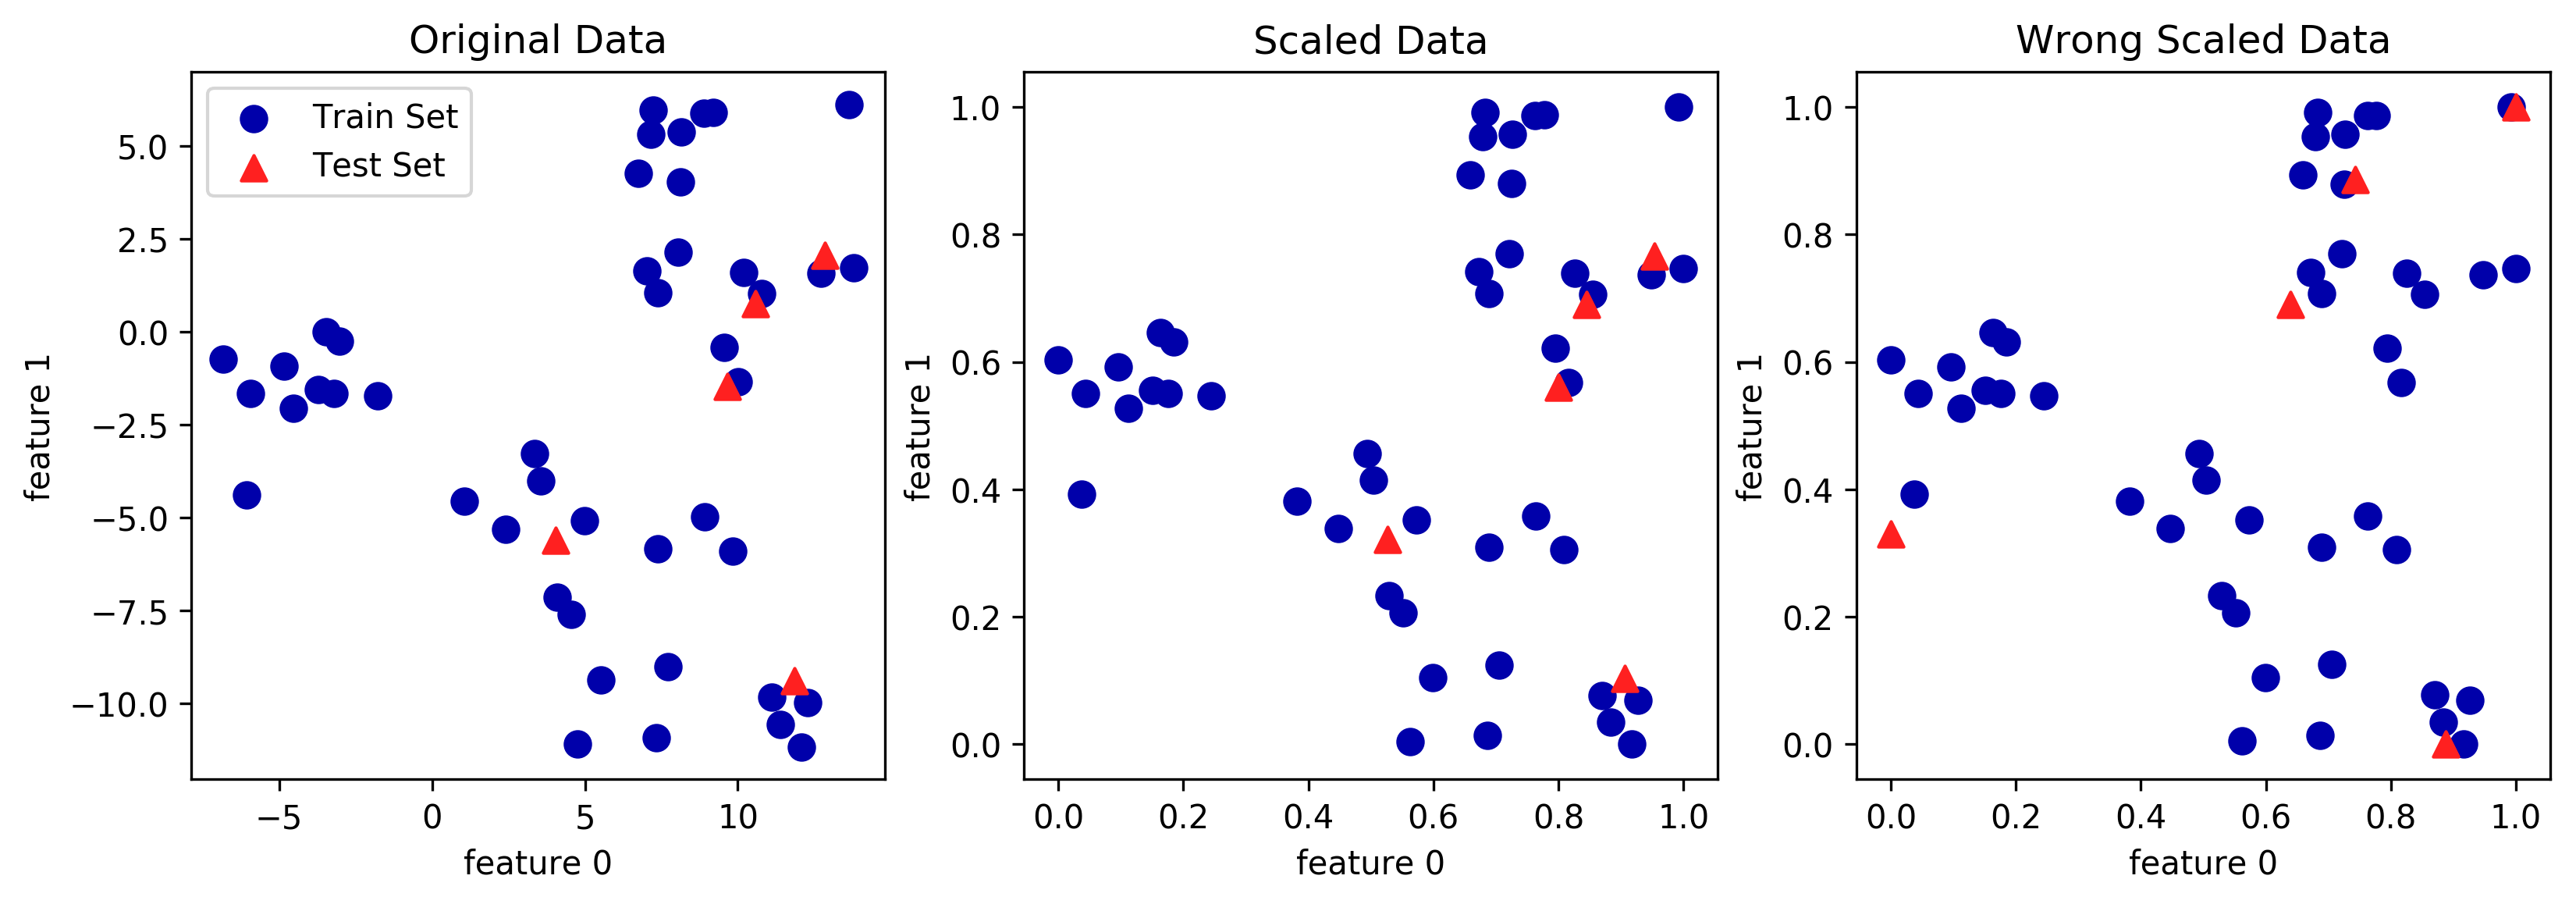

In [4]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test, = train_test_split(X, random_state=5, test_size=.1)

# 훈련 데이터 세트와 테스트 세트의 산점도
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler 사용하여 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#스케일 조정된 데이터의 산점도 그리기
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 최솟값 0, 최댓값은 1일 되도록 하여 그림 (이렇게 하면 안됨)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[2].set_title("Wrong Scaled Data")

for ax in axes:
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

- 훈련 데이터 세트와 테스트 데이터의 스케일 조정을 함께 했을 때(가운데)와 따로 했을 때(오른쪽) 미치는 영향
- 왼쪽은 원본
- 가운데는 민맥스스케일 조정
- 오른쪽은 훈련과 테스트 데이터를 따로 스케일 조정 했을때 결과
    - 스케일링 시에 훈련과 테스트 데이터를 따로 조정할 경우 데이터 배열이 뒤죽박죽 됨

#### 단축 메서드의 효율적인 방법

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X_train).transform(X_train)
# 다음과 같이 fit과 transform을 동시에 활용 가능
X_scaled_d = scaler.fit_transform(X_train)